In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [129]:
dfx=pd.read_csv("Linear_X_Train.csv")
dfy=pd.read_csv("Linear_Y_Train.csv")

x=dfx.values
y=dfy.values

print(x.shape)
print(y.shape)

X_test=pd.read_csv("Linear_X_Test.csv")
X_test.head()
x_test=X_test.values
print(dfx.head())
print(dfy.head())
#print(x_test.shape)
#print(x_test)

(3750, 1)
(3750, 1)
          x
0 -0.289307
1 -0.588810
2  1.027507
3 -0.259013
4  0.782043
           y
0  -0.091101
1 -53.467721
2  75.457009
3 -12.025286
4  57.414187


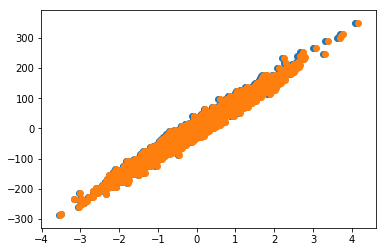

In [114]:
plt.scatter(x,y)
X=(x-x.mean())/x.std()
Y=y
plt.scatter(X,Y)#normalise data plot
plt.show()
#print(type(X))

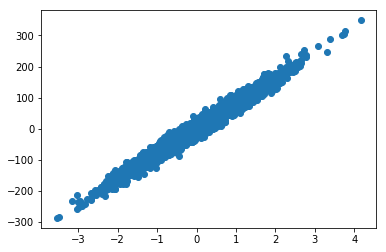

In [116]:
plt.scatter(X,Y)
plt.show()

In [74]:
#Return y for line equation y=mx+c for every xi
def hypothesis(x,theta):
    return theta[0]+theta[1]*x

#return error
def error(X,Y,theta):
    m=X.shape[0]#no of samples(data point)
    err=0
    for i in range(m):
        hx=hypothesis(X[i],theta)# hx is y value for xi
        err+=(hx-Y[i])**2
    return err

#to calculate new theta0 and theta1

def gradient(X,Y,theta):
    m=X.shape[0]
    grad=np.zeros((2,))# one for theta0 and one for theta1
    for i in range(m):
        hx=hypothesis(X[i],theta)
        grad[0]+=(hx-Y[i])
        grad[1]+=((hx-Y[i])*X[i])
    return grad
#Main Algorithm
def gradient_descent(X,Y,learning_rate=0.00001):
    theta=np.array([0.0,0.0])#initially both thetas are zero
    itr=0
    max_itr=100# we will repeatedly update thetas for max_itr no of times
    error_list=[]#to store error by appending new error each iteration
    theta_list=[]#to store thetas value after each iteration
    while itr<=max_itr:
        grad=gradient(X,Y,theta)
        e=error(X,Y,theta)
        error_list.append(e)
        theta_list.append((theta[0],theta[1]))
        theta[0]-=(learning_rate*grad[0])#updatint theta0
        theta[1]-=(learning_rate*grad[1])#updating theta1
        itr+=1
    return theta,error_list,theta_list

In [119]:
final_theta,error_list,theta_list=gradient_descent(X,Y)
print(final_theta)

[ 0.66946615 78.22285939]


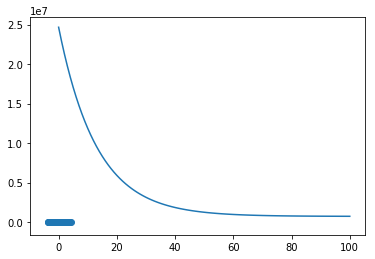

In [120]:
plt.plot(error_list)
plt.scatter(x,y)
plt.show()

In [121]:
#Plot line for testing the data
xtest=np.linspace(-3,4,25)#generate 10 equally spaced points bw -2 and 10 for testing purpose
#print(xtest)

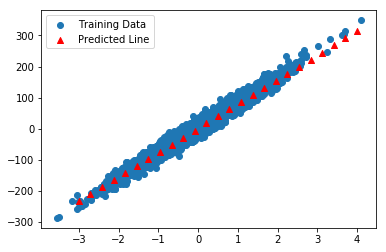

In [122]:
#Showing fitted line for the data
plt.scatter(x,y,label="Training Data")
plt.scatter(xtest,hypothesis(xtest,final_theta),color="Red",label="Predicted Line",marker="^")
plt.legend()
plt.show()# SO you can see our fitted line is passing to most of the data points

In [130]:
y_train_test=hypothesis(x,final_theta)
#for i in range(x.shape[0]):
    #print(x[i]," ",y_train_test[i])

In [131]:
y_test=hypothesis(x_test,final_theta)
#for i in range(x_test.shape[0]):
    #print(x_test[i]," ",y_test[i])
#print(y_test)
#print(y_test[0][0])

[[-146.22871569]
 [ -67.30869521]
 [-197.24863788]
 ...
 [  10.68260394]
 [ -21.07942914]
 [ -52.55535647]]
-146.22871569357284


In [125]:
df=pd.DataFrame(data=y_test,columns=["y"])

In [126]:
df.to_csv("Linear_Y_Test.csv",index=False)

In [132]:
File=pd.read_csv("Linear_Y_Test.csv")
print(File.columns)

ansFile=File.values
print(ansFile)

Index(['y'], dtype='object')
[[-146.22871569]
 [ -67.30869521]
 [-197.24863788]
 ...
 [  10.68260394]
 [ -21.07942914]
 [ -52.55535647]]
